## Work with data

- Natural Language Processing (Text)
- Computer Vision (Images)
- Speech Processing (Voice)
- Music Processing (Audio)
- Time Series
- Mixed Data

## Computer Vision

- Read the picture files
- Decode the JPEG content to RBG grids of pixels
- Convert these into floating point tensors
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval

Dogs vs cats dataset: https://www.kaggle.com/c/dogs-vs-cats/data

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

### Read pictures

In [188]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
src_data = []
labels = []

for filename in os.listdir("data/dogs_vs_cats"):
    src_data += [Image.open(f"data/dogs_vs_cats/{filename}")]
    
    labels += [0 if "cat" in filename else 1]

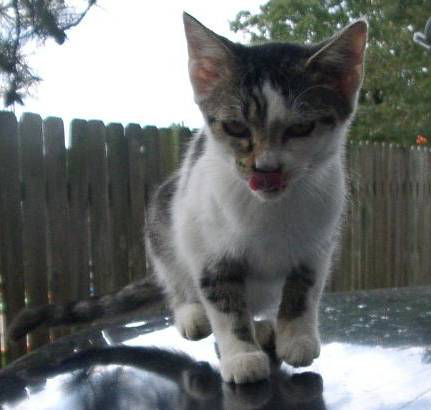

In [190]:
src_data[4]

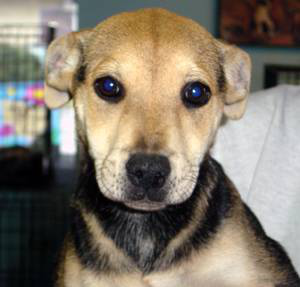

In [191]:
src_data[34]

In [192]:
print(f"{src_data[4].size} != {src_data[34].size}")

(431, 410) != (300, 287)


In [193]:
resized_data = [image.resize((128, 128)) for image in src_data]

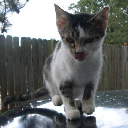

In [194]:
resized_data[4]

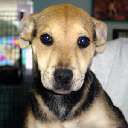

In [195]:
resized_data[34]

In [196]:
print(f"{resized_data[4].size} == {resized_data[34].size}")

(128, 128) == (128, 128)


### Decode images

In [197]:
digitized_data = [np.asarray(image) for image in resized_data]

In [198]:
digitized_data.shape

AttributeError: 'list' object has no attribute 'shape'

In [199]:
digitized_data = np.asarray(digitized_data)

In [200]:
digitized_data.shape

(40, 128, 128, 3)

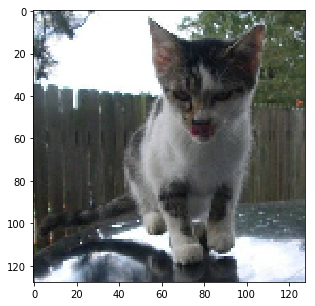

In [201]:
plt.figure(figsize = (5,5))
plt.imshow(digitized_data[4])

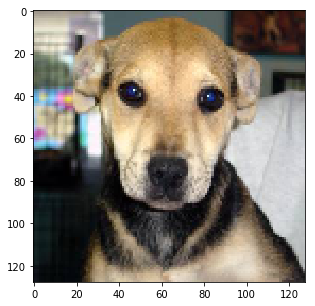

In [202]:
plt.figure(figsize = (5,5))
plt.imshow(digitized_data[34])

### Rescale 

In [203]:
rescaled_data = digitized_data/255

In [204]:
digitized_data

array([[[[124,  79,  76],
         [120,  75,  72],
         [109,  64,  61],
         ...,
         [137, 126, 122],
         [130, 117, 111],
         [123, 110, 102]],

        [[112,  67,  62],
         [107,  62,  57],
         [101,  56,  51],
         ...,
         [132, 121, 117],
         [120, 107, 101],
         [110,  97,  89]],

        [[125,  80,  74],
         [112,  67,  61],
         [103,  58,  52],
         ...,
         [135, 124, 120],
         [123, 110, 104],
         [114, 101,  93]],

        ...,

        [[137, 110, 103],
         [136, 105, 100],
         [127,  88,  83],
         ...,
         [149, 103,  90],
         [151, 105,  92],
         [156, 110,  97]],

        [[164, 135, 129],
         [154, 121, 116],
         [160, 121, 116],
         ...,
         [149, 103,  90],
         [149, 103,  90],
         [152, 106,  93]],

        [[173, 142, 137],
         [163, 128, 124],
         [163, 122, 118],
         ...,
         [150, 104,  91],
        

In [205]:
rescaled_data

array([[[[0.48627451, 0.30980392, 0.29803922],
         [0.47058824, 0.29411765, 0.28235294],
         [0.42745098, 0.25098039, 0.23921569],
         ...,
         [0.5372549 , 0.49411765, 0.47843137],
         [0.50980392, 0.45882353, 0.43529412],
         [0.48235294, 0.43137255, 0.4       ]],

        [[0.43921569, 0.2627451 , 0.24313725],
         [0.41960784, 0.24313725, 0.22352941],
         [0.39607843, 0.21960784, 0.2       ],
         ...,
         [0.51764706, 0.4745098 , 0.45882353],
         [0.47058824, 0.41960784, 0.39607843],
         [0.43137255, 0.38039216, 0.34901961]],

        [[0.49019608, 0.31372549, 0.29019608],
         [0.43921569, 0.2627451 , 0.23921569],
         [0.40392157, 0.22745098, 0.20392157],
         ...,
         [0.52941176, 0.48627451, 0.47058824],
         [0.48235294, 0.43137255, 0.40784314],
         [0.44705882, 0.39607843, 0.36470588]],

        ...,

        [[0.5372549 , 0.43137255, 0.40392157],
         [0.53333333, 0.41176471, 0.39215686]

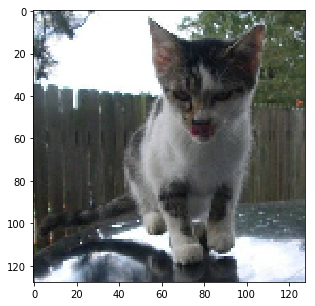

In [206]:
plt.figure(figsize = (5,5))
plt.imshow(rescaled_data[4])

In [207]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [208]:
import random

buffer = list(zip(labels, rescaled_data))

random.shuffle(buffer)

labels, data = zip(*buffer)

In [209]:
labels[7]

0

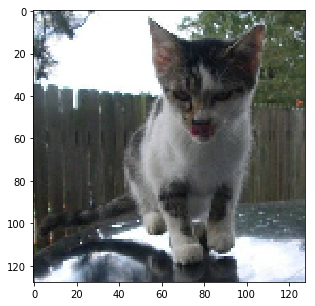

In [210]:
plt.figure(figsize = (5,5))
plt.imshow(data[7])

In [211]:
train_data = data[:34]
train_labels = data[34:]

test_data = data[:34]
test_labels = data[34:]

In [212]:
len(train_data)

34

In [213]:
len(train_labels)

6

In [214]:
len(test_data)

34

In [215]:
len(test_labels)

6